<a href="https://colab.research.google.com/github/heropaulexy79/flazetech/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [2]:
# Import Data into Dataframe
df = pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


From the analysis above, we see that the mean of the selling price column is 4.67 while the maximum value in the column is 35. What that suggests to us is that there's an outlier that needs to be dealt with.

In [6]:
# Dealing with suspected outlier
trim = q1, q9 = df["Selling_Price"].quantile([0.1, 0.9])
mask = df["Selling_Price"].between(q1,q9)
df= df[mask]

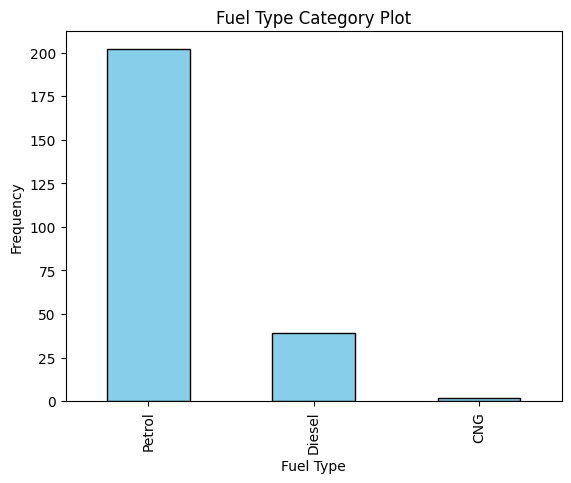

In [7]:
# Count unique values in each category
fuel_type_counts = df["Fuel_Type"].value_counts()

# Plot the category types
fuel_type_counts.plot(kind="bar", color='skyblue', edgecolor='black')
plt.xlabel("Fuel Type")
plt.ylabel("Frequency")
plt.title("Fuel Type Category Plot")
plt.show()

**The plot above showed that bulk of the cars to be analyzed uses petrol as it's fuel type. Let's analyze further.**

In [8]:
df["Selling_type"].unique()

array(['Dealer', 'Individual'], dtype=object)

### Let's see if there is any relationship between the selling price and the total number of kms driven.

Text(0.5, 1.0, 'Relationship between total kms driven and selling price')

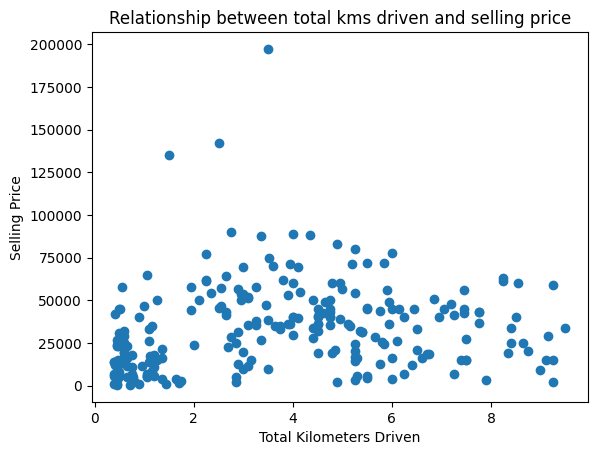

In [9]:
plt.scatter(df['Selling_Price'], df['Driven_kms'])
plt.xlabel("Total Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Relationship between total kms driven and selling price")

Text(0.5, 1.0, 'Relationship between total kms driven and selling price')

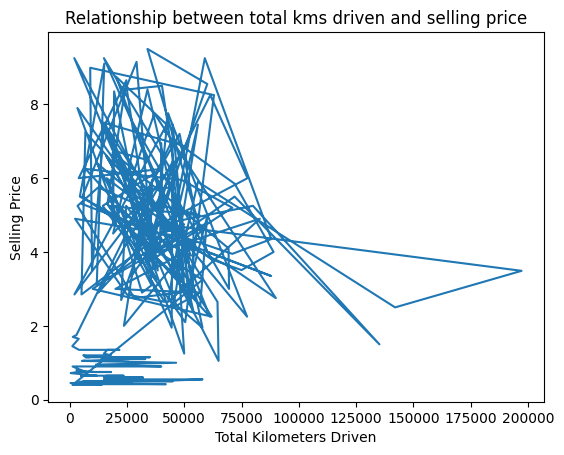

In [10]:
plt.plot(df['Driven_kms'], df['Selling_Price'])
plt.xlabel("Total Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Relationship between total kms driven and selling price")

<Axes: title={'center': 'Driven_kms'}, xlabel='Selling_Price'>

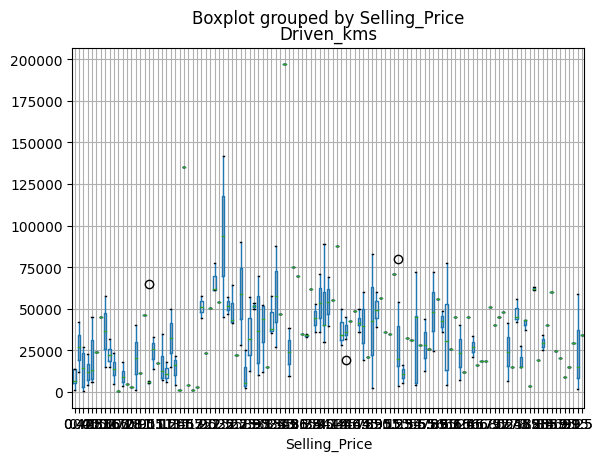

In [11]:
df.boxplot(column='Driven_kms', by='Selling_Price')

It is safe to say that there is no positive correlation between the selling price and the total number of kms driven

## **Visualize relationship between selling price and fuel type**

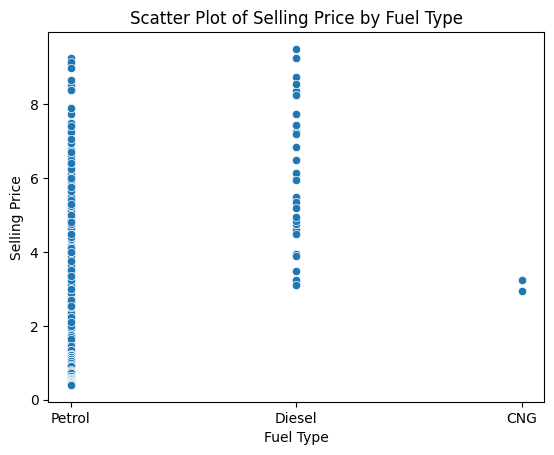

In [12]:
# Create scatterplot
sns.scatterplot(x="Fuel_Type", y="Selling_Price", data=df)

# Adding labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Selling Price by Fuel Type')

# Display the plot
plt.show()

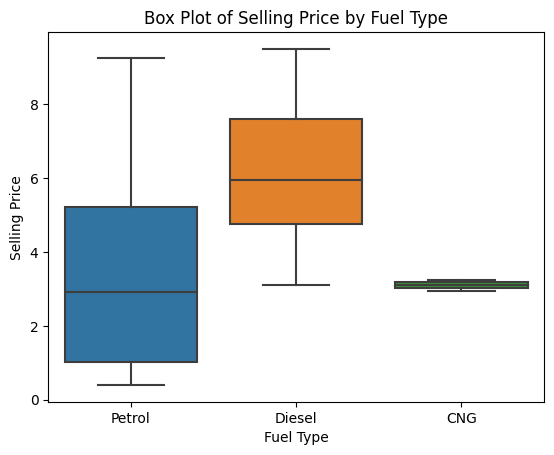

In [13]:
# Create boxplot
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=df)

# Adding labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Box Plot of Selling Price by Fuel Type')

# Display the plot
plt.show()

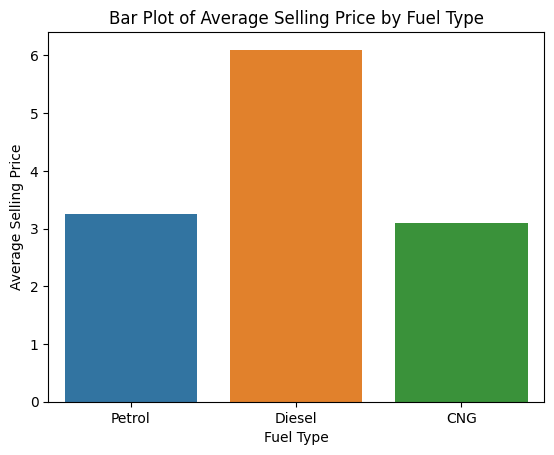

In [14]:
# Create a bar plot
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df, errorbar=None)  # ci=None removes error bars

# Adding labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.title('Bar Plot of Average Selling Price by Fuel Type')

# Display the plot
plt.show()

From the visualizations, we can see that cars with diesel as the fuel type are more costlier

## **Visualize relationship between selling price and selling type**

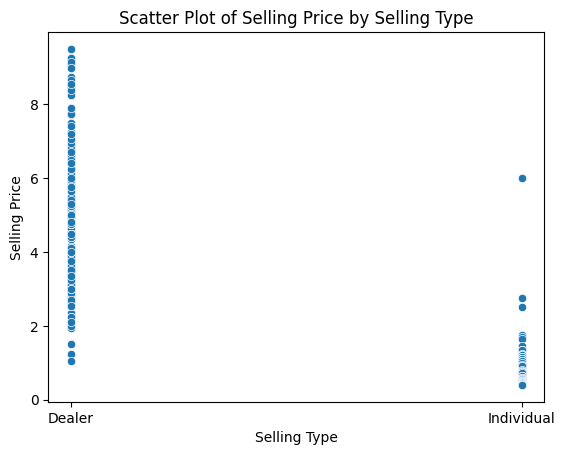

In [15]:
# Create scatterplot
sns.scatterplot(x="Selling_type", y="Selling_Price", data=df)

# Adding labels and title
plt.xlabel('Selling Type')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Selling Price by Selling Type')

# Display the plot
plt.show()

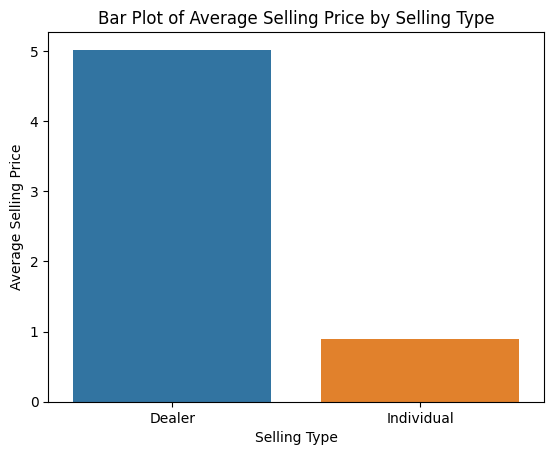

In [16]:
# Create a bar plot
sns.barplot(x='Selling_type', y='Selling_Price', data=df, errorbar=None)  # ci=None removes error bars

# Adding labels and title
plt.xlabel('Selling Type')
plt.ylabel('Average Selling Price')
plt.title('Bar Plot of Average Selling Price by Selling Type')

# Display the plot
plt.show()

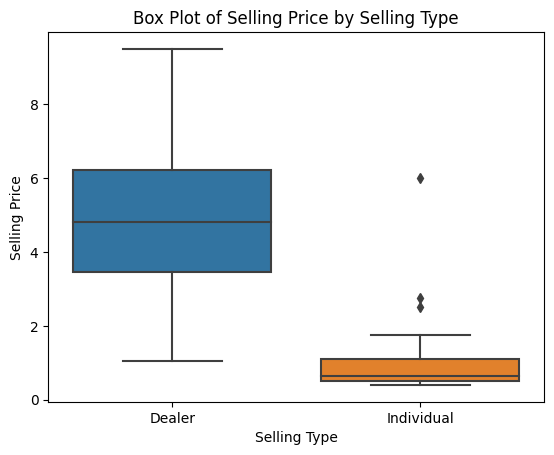

In [17]:
# Create boxplot
sns.boxplot(x="Selling_type", y="Selling_Price", data=df)

# Adding labels and title
plt.xlabel('Selling Type')
plt.ylabel('Selling Price')
plt.title('Box Plot of Selling Price by Selling Type')

# Display the plot
plt.show()

## Visualize relationship between year of manufacture and the selling price

We want to see how the year the care was manufactured affects the selling price of the car

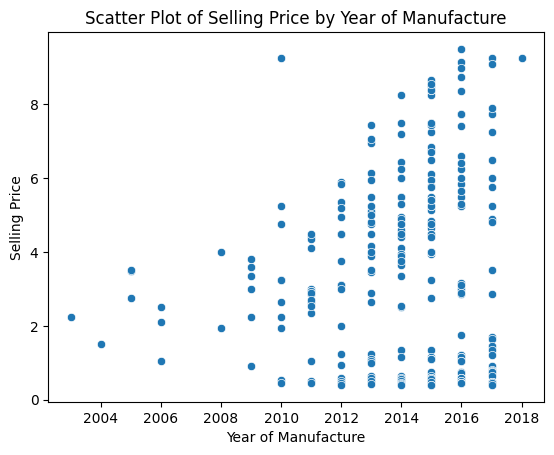

In [18]:
# Create scatterplot
sns.scatterplot(x="Year", y="Selling_Price", data=df)

# Adding labels and title
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Selling Price by Year of Manufacture')

# Display the plot
plt.show()

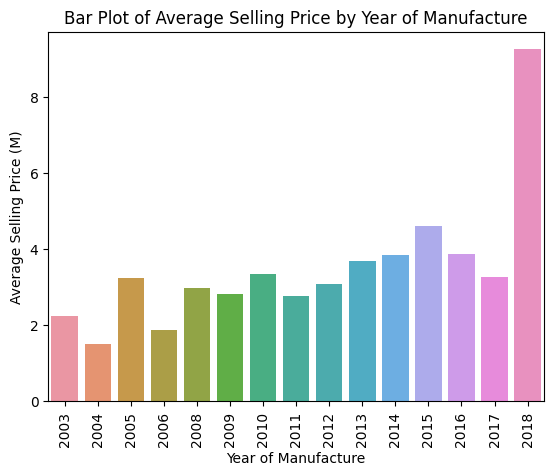

In [21]:
# Create a bar plot
sns.barplot(x='Year', y='Selling_Price', data=df, errorbar=None)  # ci=None removes error bars

# Adding labels and title
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Selling Price (M)')
plt.title('Bar Plot of Average Selling Price by Year of Manufacture')
plt.xticks(rotation=90)
# Display the plot
plt.show()